In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords

# download files needed for nltk
nltk.download('punkt')
nltk.download('stopwords')

tweets_csv = pd.read_csv("tweets.csv")

tweets = tweets_csv["text"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
word_count = dict()

for index, tweet in tweets.iteritems():
    # No clue why, but this print statement has to be here or tweet.split() will throw an error
    print(tweet)
    words = nltk.word_tokenize(tweet.lower())
    filtered_words = [word for word in words if not word.lower() in stopwords.words('english')]
    for word in filtered_words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?
Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ
RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)
RT @jww372: I don't have to guess your religion! #ChristmasAftermath
RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see

https://t.co/HjhPguBK1Y by @alisonrose711
@ModicaGiunta me, too!
RT @MDBlanchfield: You’ll never guess who tweeted something false that he saw on TV - The Washington Post https://t.co/K2e4XdXRfu
RT @100PercFEDUP: New post: WATCH: DIAMOND AND SILK Rip On John Kerry Over Israel Comments (VIDEO) https://t.co/NkdKaQ9yYu
RT @AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https://t.co/JjlZxaW3JN https://t.co/qW2Ok9ROxH
One of the ways to remind that #BlackLivesMatter #BlackPressDay
RT @ElPenguinito: #myfarewellwordswould

In [3]:
filtered_count = {k:v for (k,v) in word_count.items() if len(k) > 2 and v >= 100}
sorted_count = sorted(filtered_count.items(), key=lambda x:x[1], reverse=True )

for key, count in sorted_count:
    print(key + " " + str(count))

https 9193
trump 2089
n't 1012
... 907
clinton 873
hillary 810
amp 733
obama 670
http 603
people 529
like 409
new 403
get 368
donald 364
realdonaldtrump 364
one 340
politics 334
news 333
via 309
america 283
president 276
tcot 269
make 256
time 248
would 246
're 241
vote 240
says 237
hillaryclinton 236
know 234
want 229
day 225
pjnet 220
black 217
election 215
gop 214
see 214
think 209
say 206
never 205
good 205
maga 201
need 200
video 199
love 198
midnight 197
media 194
campaign 191
right 187
take 175
blicqer 174
going 172
let 171
world 167
got 166
white 166
life 165
back 164
man 160
first 158
still 156
support 153
//t.… 152
really 151
//… 148
great 148
today 147
could 146
police 145
said 145
country 143
cnn 142
stop 142
american 141
every 141
state 141
'll 138
watch 137
bill 136
//t… 135
isis 134
women 134
real 133
show 133
god 129
years 129
https… 128
best 127
debate 127
always 126
post 126
//t.c… 124
last 124
potus 123
way 122
help 122
live 121
dnc 120
free 118
much 118
muslim 117
c

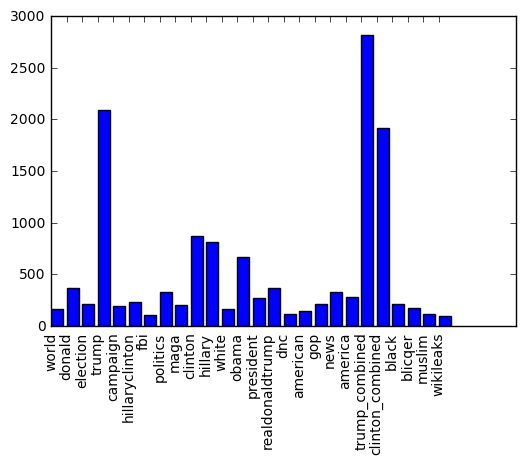

In [4]:
selected = dict(
    trump= filtered_count["trump"],
    clinton= filtered_count["clinton"],
    hillary= filtered_count["hillary"],
    obama= filtered_count["obama"],
    realdonaldtrump= filtered_count["realdonaldtrump"],
    donald= filtered_count["donald"],
    politics= filtered_count["politics"],
    news= filtered_count["news"],
    america= filtered_count["america"],
    president= filtered_count["president"],
    hillaryclinton= filtered_count["hillaryclinton"],
    black= filtered_count["black"],
    election= filtered_count["election"],
    gop= filtered_count["gop"],
    maga= filtered_count["maga"],
    campaign= filtered_count["campaign"],
    blicqer= filtered_count["blicqer"],
    world= filtered_count["world"],
    white= filtered_count["white"],
    american= filtered_count["american"],
    dnc= filtered_count["dnc"],
    muslim= filtered_count["muslim"],
    fbi= filtered_count["fbi"],
    wikileaks= filtered_count["wikileaks"],
    clinton_combined=filtered_count["hillary"] + filtered_count["clinton"] + filtered_count["hillaryclinton"],
    trump_combined = filtered_count["trump"] + filtered_count["realdonaldtrump"] + filtered_count["donald"]
)

plt.bar(range(len(selected)), selected.values())
plt.xticks(range(len(selected)), selected.keys(), rotation="vertical")
plt.show()

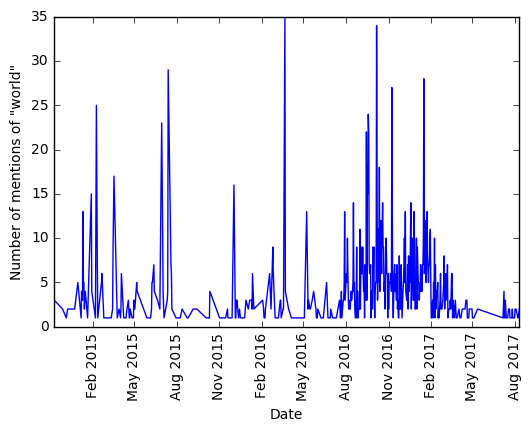

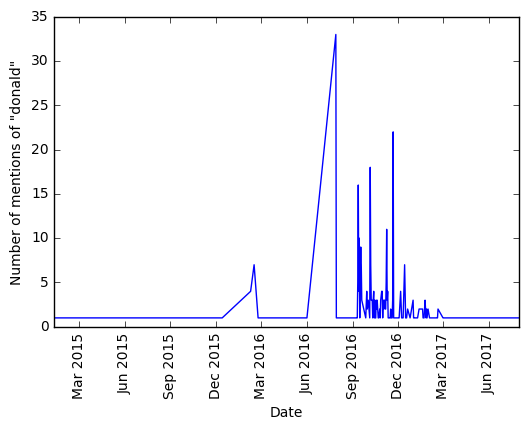

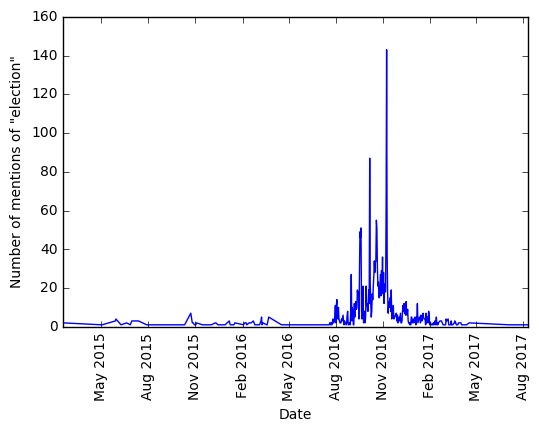

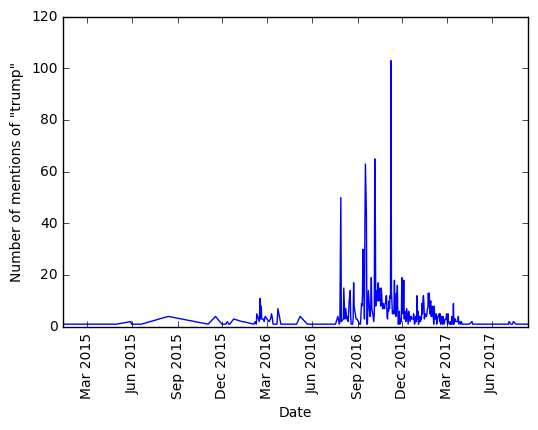

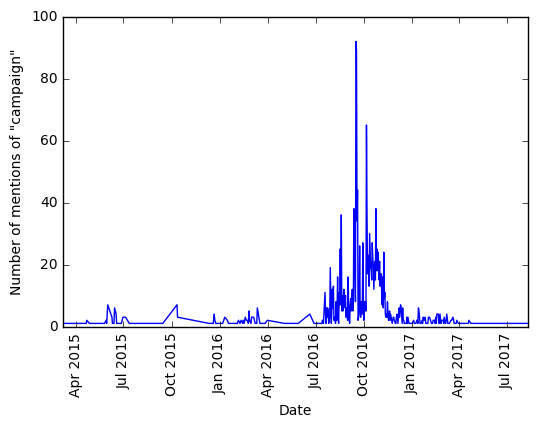

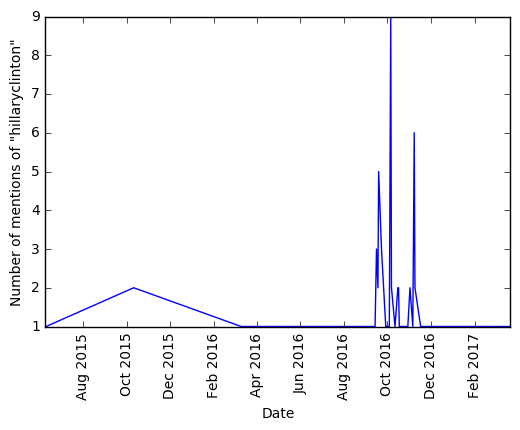

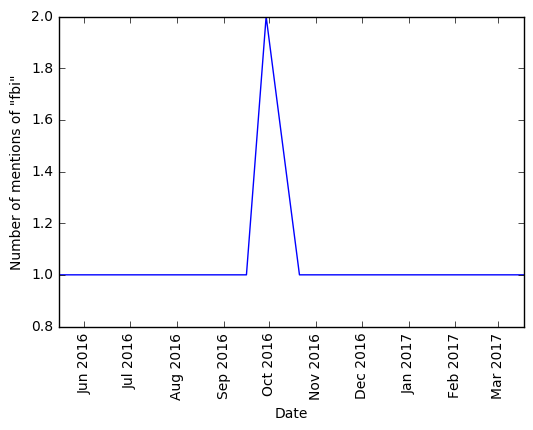

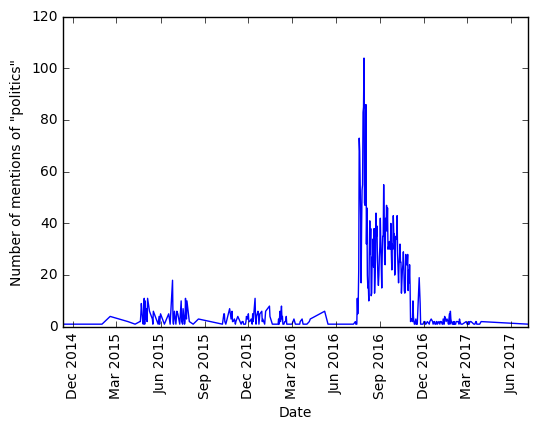

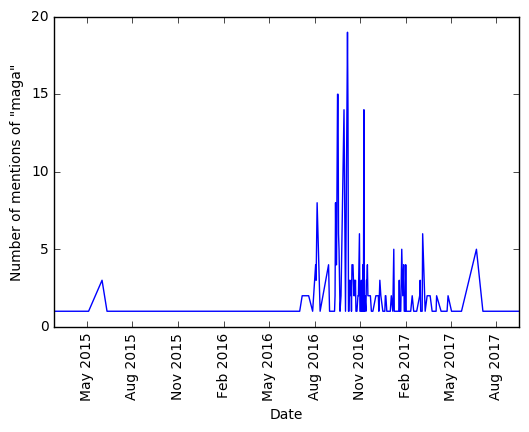

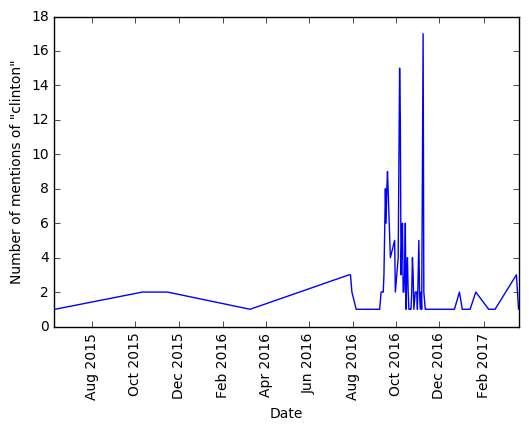

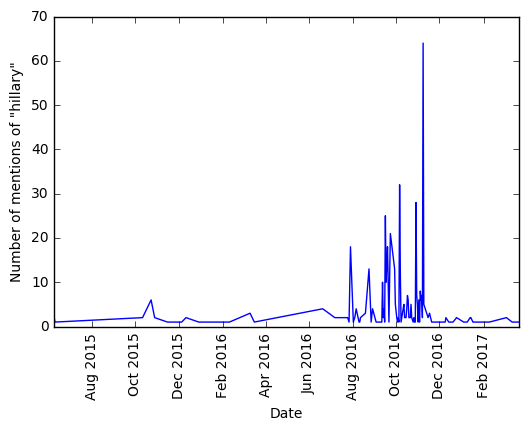

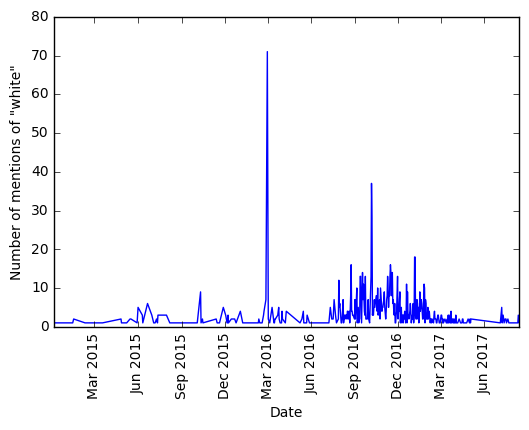

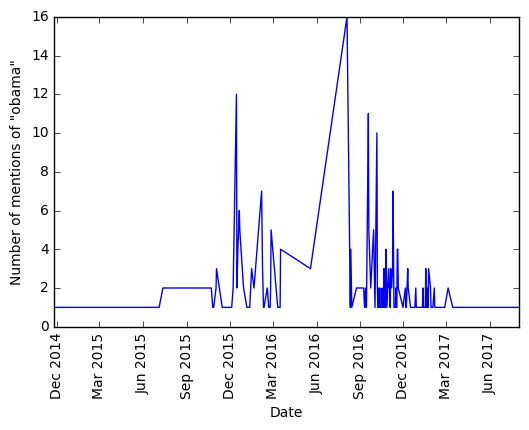

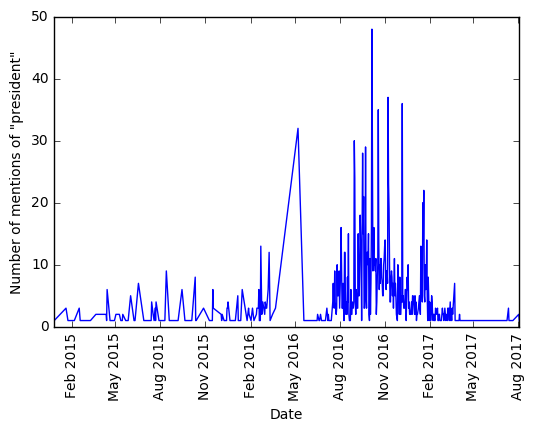

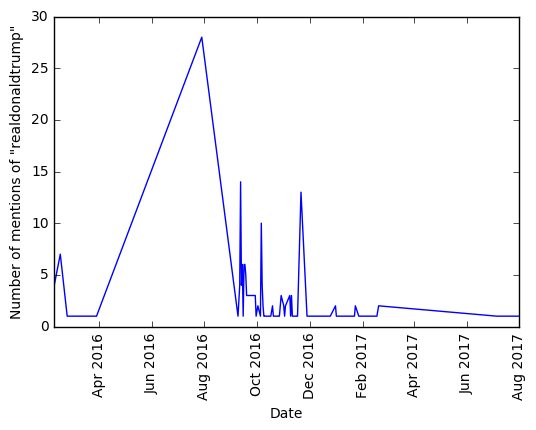

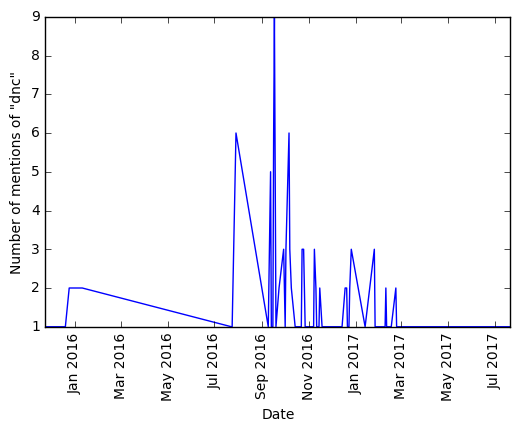

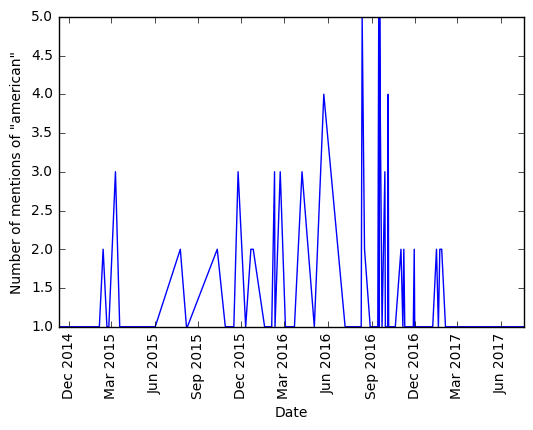

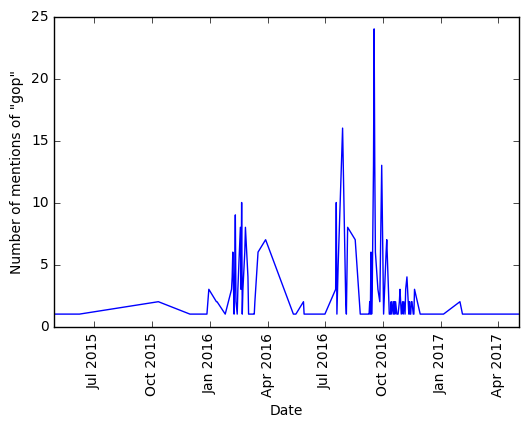

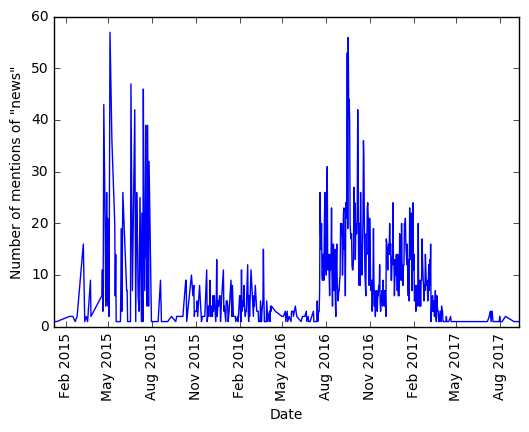

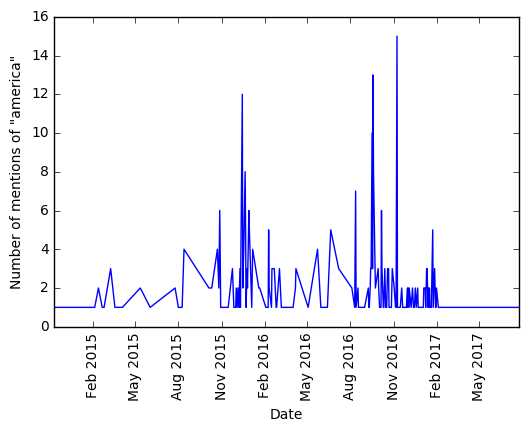

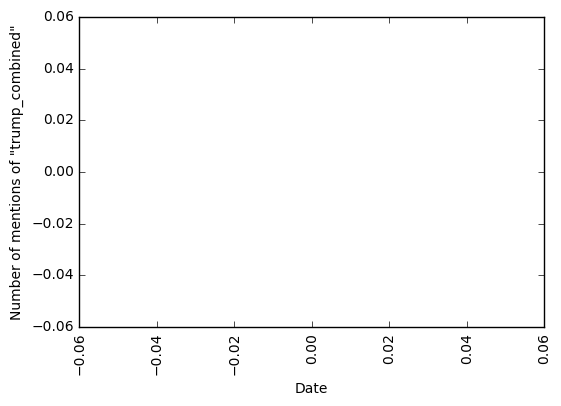

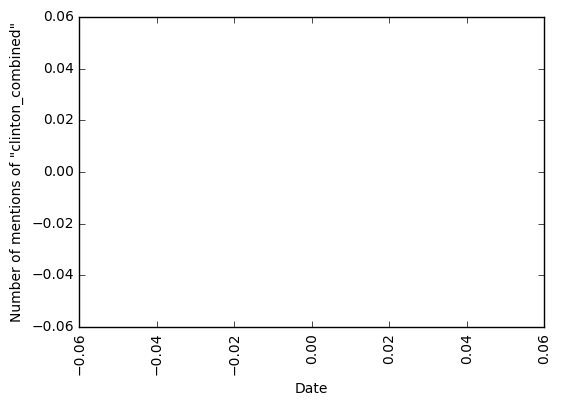

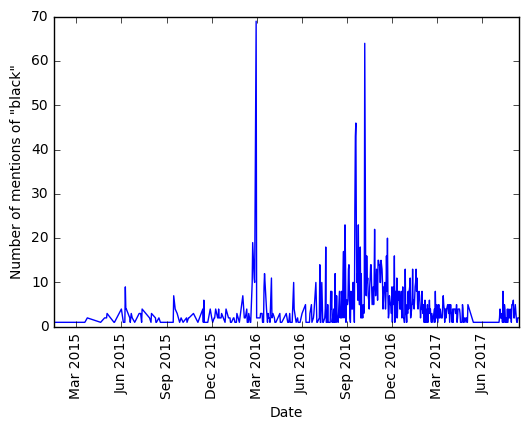

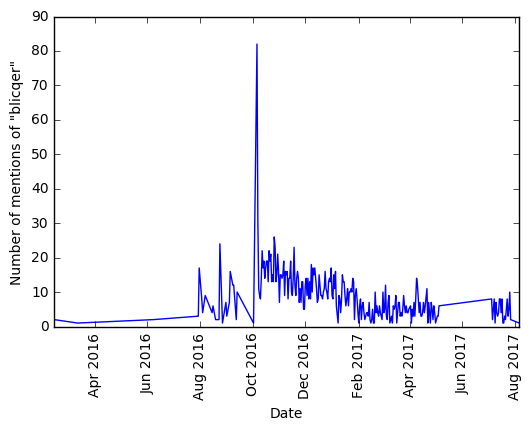

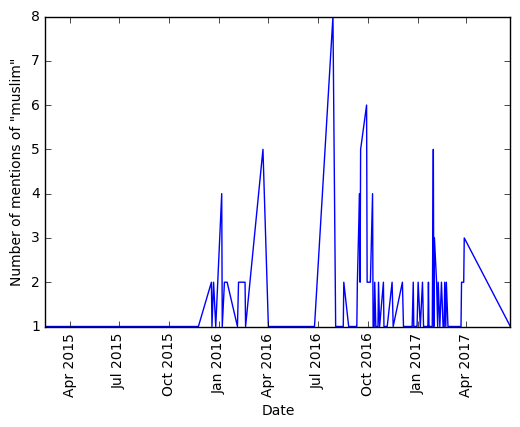

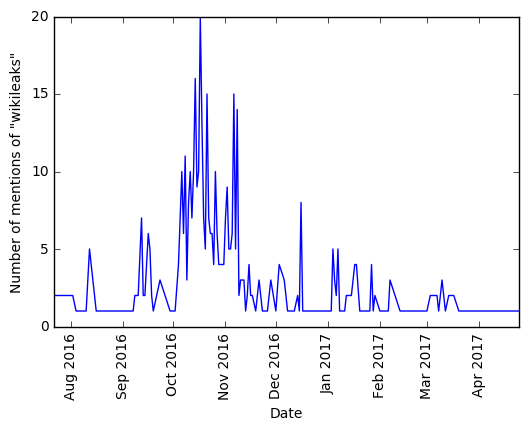

In [38]:
import datetime

def GetDates(word):
    datesFrame = tweets_csv[tweets_csv['text'].str.contains(word) == True]

    dateCount = dict()

    for index, date in datesFrame['created_str'].iteritems():
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
    
        if (sdate in dateCount):
            dateCount[sdate] += 1
        else:
            dateCount[sdate] = 1
        
    orderDateCount = sorted(dateCount.items(), key=lambda x:x[0], reverse=True)
    return orderDateCount

def PlotMentions(dates, word):
    x_val = [x[0] for x in dates]
    y_val = [x[1] for x in dates]
    
    plt.plot(x_val, y_val)
    plt.xticks(rotation=90)
    plt.ylabel("Number of mentions of \"" + word + "\"")
    plt.xlabel("Date")
    plt.show()
    
for word in selected.keys():
    PlotMentions(GetDates(word), word)